In [1]:
from analytics import dashboard
today_live_prices, all_day_prices = dashboard.STORAGE.prices.get()
today_live_returns, all_day_returns = dashboard.STORAGE.returns.get()
today_live_and_30d_returns, all_day_and_30d_returns = dashboard.STORAGE._30day_returns.get()

In [4]:
today_live_returns, all_day_returns

({'timestamp': 1732955924,
  '2022-07-23': -0.04457724081293212,
  '2022-08-21': 0.0,
  '2022-09-18': 0.0},
 [{'timestamp': 1732955924,
   '2022-07-23': -0.04457724081293212,
   '2022-08-21': 0.0,
   '2022-09-18': 0.0},
  {'timestamp': 1732955900,
   '2022-07-23': -0.04457724081293212,
   '2022-08-21': 0.0,
   '2022-09-18': 0.0}])

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
import pandas as pd

## Live Returns

In [4]:
from datetime import datetime

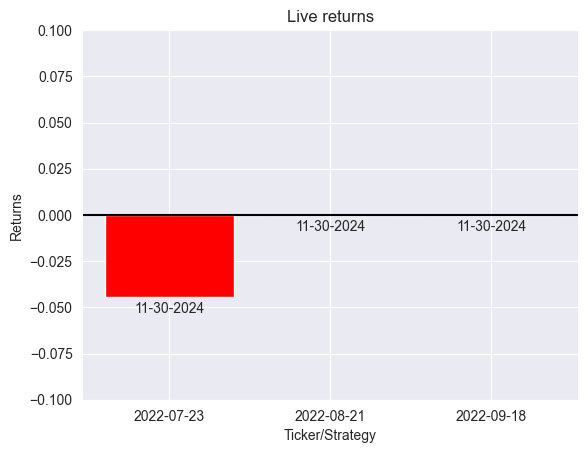

In [5]:
today_live_returns, all_day_returns = dashboard.STORAGE.returns.get()


filter_keys = sorted([_ for _ in today_live_returns.keys() if _ not in ["timestamp"]])
colors = ['g' if today_live_returns[x] > 0 else 'r' for x in filter_keys]
plt.bar(filter_keys, [today_live_returns[x] for x in filter_keys], color=colors)
plt.title('Live returns')
plt.ylabel('Returns')
plt.xlabel('Ticker/Strategy')
plt.ylim(-0.1, 0.1)
plt.axhline(y=0, color='k')

ax = plt.gca()
rects = ax.patches
label_offset = 0.01
label_signs = [1 if today_live_returns[x] > 0 else -1 for x in filter_keys]

#today_live_returns['timestamp'] = datetime.now().timestamp()
timestamp = datetime.fromtimestamp(today_live_returns['timestamp'])


timestamp = timestamp.strftime('%H:%M:%S') if timestamp.date() == datetime.today().date() else timestamp.strftime('%m-%d-%Y')
    
# Make some labels.
labels = [timestamp for i in range(len(rects))]

for rect, label, sign in zip(rects, labels, label_signs):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + sign*label_offset, label, ha="center", va="bottom"
    )


plt.show()

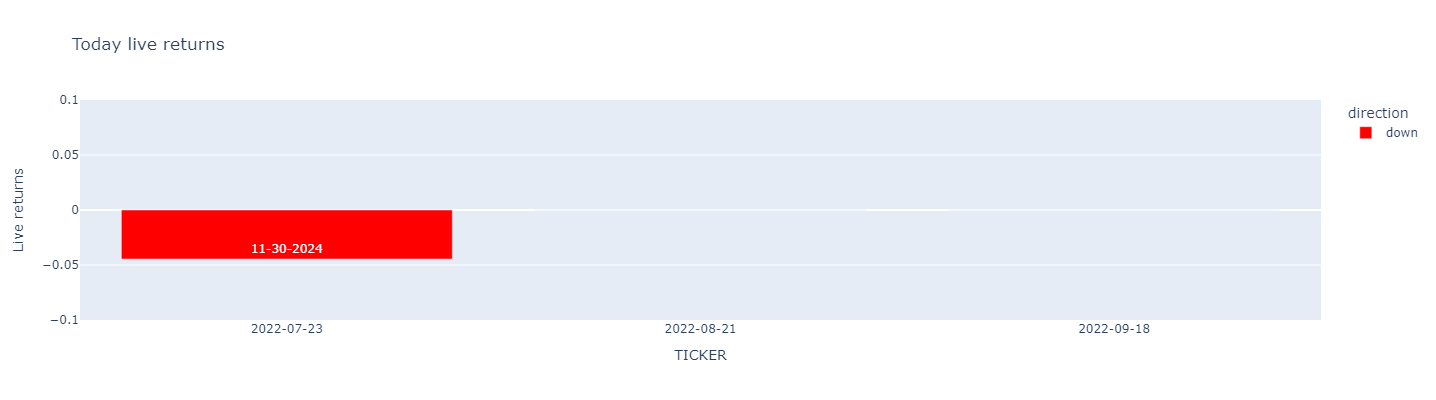

In [53]:
import plotly.express as px
from datetime import datetime

today_live_returns, all_day_returns = dashboard.STORAGE.returns.get()
selected_stocks = ['AAPL','GOOG','MSFT','2022-07-23','2022-08-21','2022-09-18']
tickers = sorted([_ for _ in today_live_returns.keys() if _ in selected_stocks])
live_returns = [today_live_returns[x] for x in tickers]

df = pd.DataFrame(zip(tickers, live_returns), columns=['TICKER', 'Live returns'])
df['direction'] = ['up' if x > 0 else 'down' for x in live_returns]

timestamp = datetime.fromtimestamp(today_live_returns['timestamp'])
df['labels'] = [timestamp.strftime('%H:%M:%S') if timestamp.date() == datetime.today().date() else timestamp.strftime('%m-%d-%Y') for _ in tickers]


fig = px.bar(df, x='TICKER', y='Live returns',
            color='direction',
            color_discrete_sequence =['red','green'],
            hover_data=['Live returns'],
            text='labels',
            title='Today live returns',
            height=400)
fig.update_layout(xaxis=dict(type='category')) # type update to category
# Set the y-axis range
fig.update_yaxes(range=[-0.1, 0.1])

fig.show()

(-0.1, 0.1)

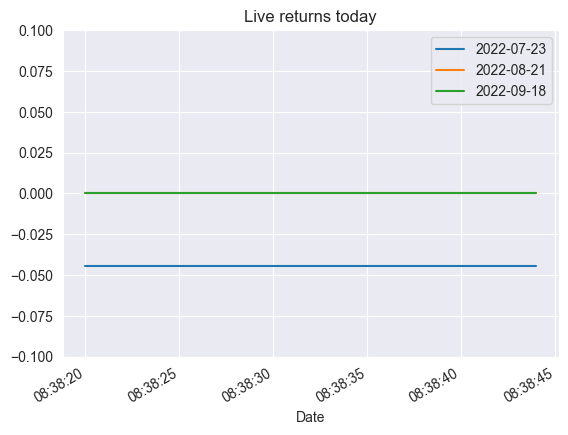

In [6]:
today_live_returns, all_day_returns = dashboard.STORAGE.returns.get()

df = pd.DataFrame(all_day_returns)
df['Date'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.drop('timestamp', axis=1).set_index('Date')

ax = df.plot()

ax.set_title('Live returns today')
ax.set_ylim(-0.1, 0.1)

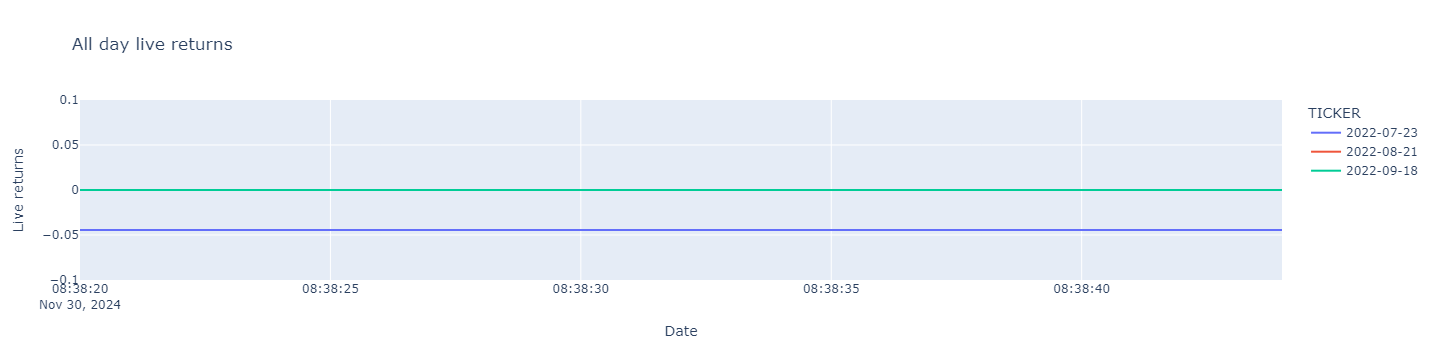

In [62]:
import plotly.express as px
from datetime import datetime

today_live_returns, all_day_returns = dashboard.STORAGE.returns.get()

df = pd.DataFrame(all_day_returns)
df['Date'] = pd.to_datetime(df['timestamp'], unit='s')
df = df.drop('timestamp', axis=1).set_index('Date')[df.columns.intersection(selected_stocks)]


fig = px.line(df,title='All day live returns')
fig.update_layout(legend_title_text='TICKER')
# Set the y-axis range
fig.update_yaxes(range=[-0.1, 0.1],title='Live returns')

fig.show()

### Returns

(-0.1, 0.1)

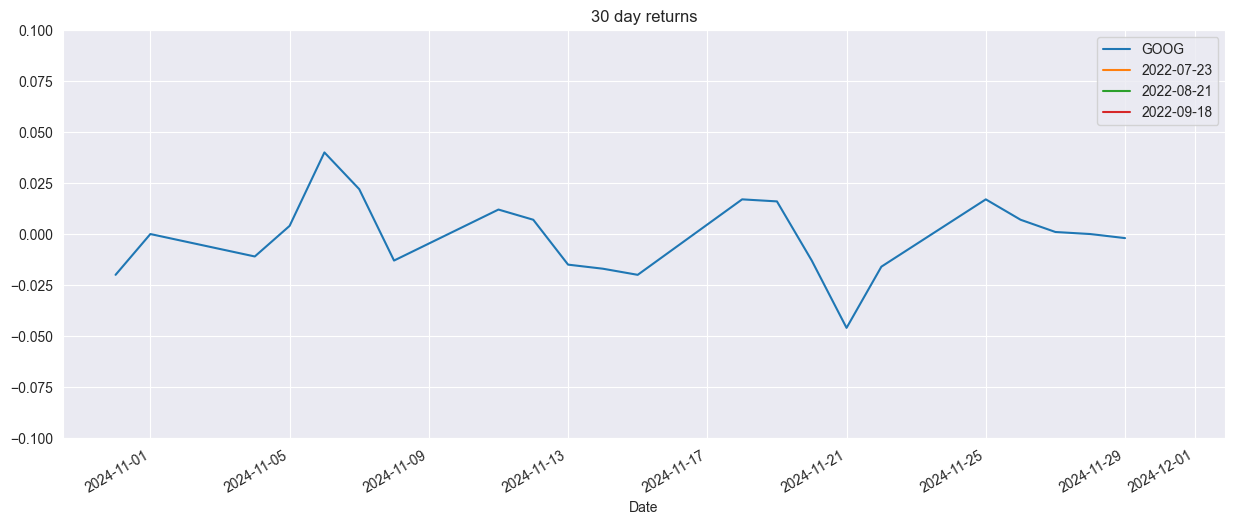

In [7]:
today_live_and_30d_returns, all_day_and_30d_returns = dashboard.STORAGE._30day_returns.get()

filter_cols = [x for x in today_live_and_30d_returns.columns if x in ['2022-07-23','2022-08-21','2022-09-18','GOOG']]

ax = today_live_and_30d_returns[filter_cols].plot(figsize=(15,6))

ax.set_title('30 day returns')
ax.set_ylim(-0.1, 0.1)


(-0.1, 0.1)

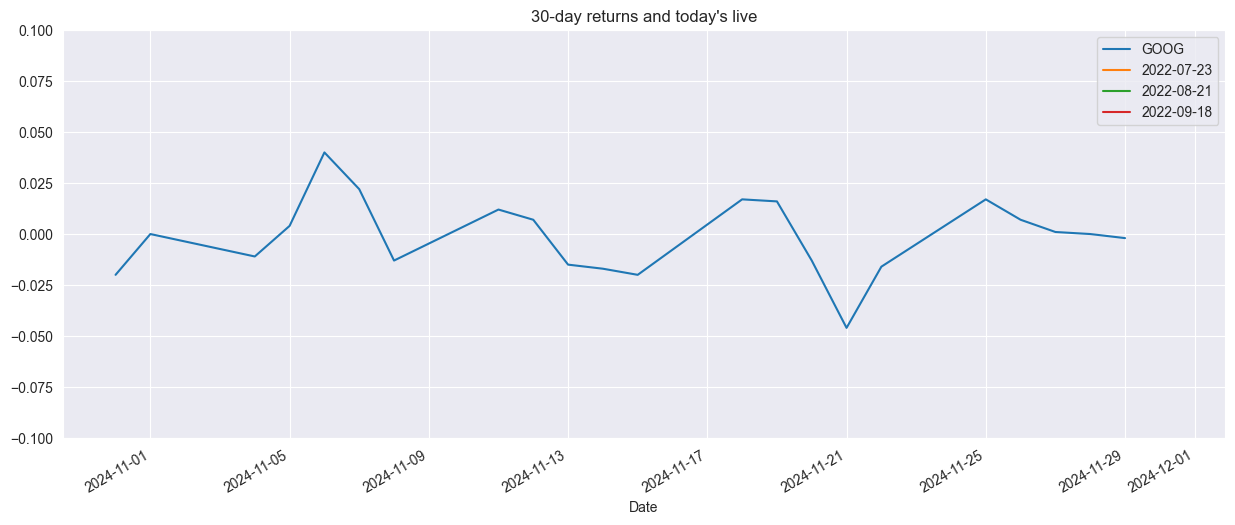

In [8]:
today_live_and_30d_returns, all_day_and_30d_returns = dashboard.STORAGE._30day_returns.get()

filter_cols = [x for x in all_day_and_30d_returns.columns if x in ['2022-07-23','2022-08-21','2022-09-18','GOOG']]

ax = all_day_and_30d_returns[filter_cols].plot(figsize=(15,6))

ax.set_title('30-day returns and today\'s live')
ax.set_ylim(-0.1, 0.1)

### Dashboard

In [1]:
!python analytics\dash_app.py